Considérons l'ensemble de données suivant.   
Il s'agit d'une collection de maisons et de leurs spécificités, ainsi que de leur prix de vente   
Sa documentation complète est disponible dans le dossier du cours.

In [3]:
import pandas as pd

data = pd.read_csv('Data/ML_Houses_dataset_train.csv')

# Data

In [7]:
data.shape

(1460, 81)

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Visualiser `X` et `y`

Commençons par une modélisation simple du prix `"SalePrice"` `y` en fonction de la surface habitable `"GrLivArea"` `X`.

In [5]:
livecode_data = data[['GrLivArea', "SalePrice"]]

livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


## Exploration

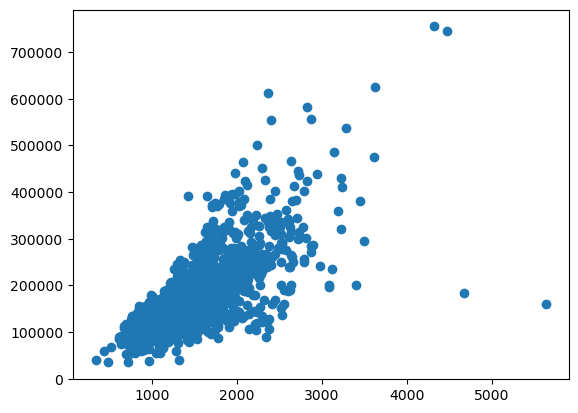

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data['GrLivArea'], data['SalePrice'])

Observons ensemble la droite de regression linéaire calculé par `seaborn`.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

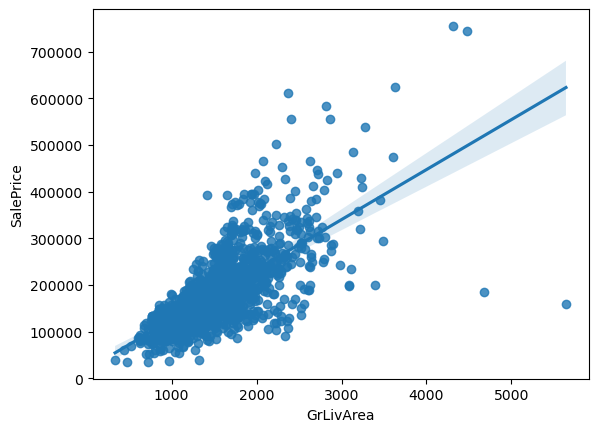

In [11]:
import seaborn as sns

sns.regplot(x = "GrLivArea", y = "SalePrice", data = data)

Observons ensemble la droite de regression linéaire calculé par `Numpy`.

Numpy utilise la [`méthode des moindres carrés`](https://www.youtube.com/watch?v=wEf7iy49PMQ).

Autres méthodes possibles (plus complexes) : https://www.kdnuggets.com/2020/09/solving-linear-regression.html 

In [12]:
y = 107 * 100 + 18550
print(y)

29250


[  107.13035897 18569.02585649]


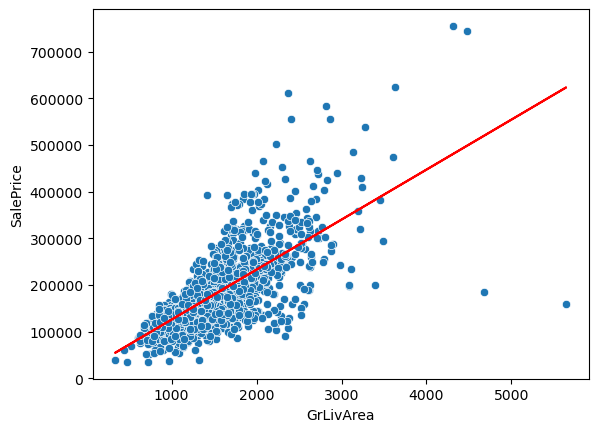

In [15]:
import numpy as np
import seaborn as sns
model = np.polyfit(x = data["GrLivArea"], y = data["SalePrice"], deg = 1)

print(model)

X = data["GrLivArea"]

a = model[0]
b = model[1]


y = a * X + b

sns.scatterplot(x ="GrLivArea", y = "SalePrice", data = data)
plt.plot(X, y, color='red')

On observe qu'une maison de taille 0 pied carré coûte 18550 $.

Pour chaque pied carré en plus, le prix augmente de 107 $.

# Mon premier modèle de Regression Linéaire

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data[["GrLivArea"]]

y = data['SalePrice']


model.fit(X, y)

LinearRegression()

À ce niveau là, le modèle a calculé (appris) le `coeff` `a` et l'`intercept` `b` optimaux pour représenter la relation entre `X` et `y`.


# Les attributs du modèle

Une fois entraîné, le modèle peut avoir accès à ses attributs.  
Parmi eux, on trouve les valeurs apprisent 
pour le `coeff` `a` et l'`intercept` `b`.

In [14]:
a = model.coef_
a

array([107.13035897])

In [15]:
b = model.intercept_
b

18569.02585648728

Pour accéder aux attributs du modèle, il faut écrire le nom du modèle entraîné, suivi de la touche `tab`.

# Predictions

Une des méthodes disponible après entraînement du modèle permet de faire des prédictions.  
`.predict()` prend en paramètre un `ndarray` avec deux crochets `2D array`, car il peut y avoir potentiellement plusieurs colonnes pour les X.  
Nous avons choisis ici une seule variable pour les X, `GrLivArea`

Ici, je cherche à prédire le prix d'un appartement qui fait 1000 pieds carrés.

In [18]:
model.predict([[1000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([125699.38482231])

La méthode `.predict()` utilise simplement l'equation de la droite de regression linéaire `y = a * X + b`

In [19]:
a * 1000 + b

125699.38482231248

Selon le modèle, une maison de 1000 pieds carrés coûterait `125699 $`.

Il est aussi possible de prédire le prix de différentes surfaces habitables `GrLivArea`.

In [17]:
model.predict([[1000], [167]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([125699.38482231,  36459.79580378])

# Les résiduels

On va observer les résiduels pour une maison:   
La différence entre le prix réel d'une maison et le prix prédit pour cette même maison.

In [20]:
X.iloc[0]

GrLivArea    1710
Name: 0, dtype: int64

On peut calculer les résiduels pour toutes les maisons de notre jeu de données sur lequel s'est entraîné notre modèle.

In [19]:
y.iloc[0]

208500

In [20]:
model.predict([[1710]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([201761.93968805])

In [22]:
residuals_house_1 = y.iloc[0] - model.predict([[1710]])
residuals_house_1

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6738.06031195])

In [23]:
y_pred = model.predict(X)
y_pred

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [24]:
residuals = y - y_pred
residuals

0        6738.060312
1       27732.461129
2       13596.153031
3      -62511.852201
4       -4041.554863
            ...     
1455   -20012.727073
1456   -30650.259993
1457    -2754.065837
1458     8069.447178
1459    -5624.756718
Name: SalePrice, Length: 1460, dtype: float64

# Scoring

Chaque algorithme de `Scikit-learn` possède une métrique de scoring par défaut.
* Les algorithmes qui permettent de faire de la `regression` ont par défaut la métrique `r_squared`: Le coefficient de détermination.
* Les algorithmes qui permettent de faire de la `classification` ont par défaut la métrique `accuracy`: La précision. ⚠️ À ne pas confondre avec la métrique `precision` qui est une autre métrique. On y reviendra...

## Interprétation du `r_squared`

In [25]:
model.score(X, y)

0.5021486502718042

Le `r_squared`:
* représente la proportion de la variance de `y` expliquée par `X`. Dans notre exemple, 50% de la variance du prix est explicable par la surface habitable
* Le score varie entre 0 et 1
* Plus le score est élevé, meilleur est le modèle

## Comment est calculer le `r_squared` ? 

In [26]:
# 1 On calcule la somme des résiduels élevés au carrés (Sum of Square Residuals)

SSR = sum(residuals ** 2)
SSR

4584171086113.127

In [27]:
# 2 - On calcule la somme des écarts au carré de chaque valeur de y par rapport à la moyenne.

res = []

for value in y:
  res.append((value - y.mean()) ** 2)

diff_mean_squared = sum(res)
print(diff_mean_squared)

9207911334609.98


In [28]:
# R_squared

r_squared = 1 - (SSR / diff_mean_squared)



r_squared2 = (diff_mean_squared - SSR) / \
                diff_mean_squared
r_squared

0.5021486502718047

# Récapitulatif - Flux de modélisation 

1. Import de l'algorithme: `from sklearn import model`
2. Instantiation de l'algorithme: `model = model()`
3. Entraînement de l'algorithme/modèle: `model.fit(X, y)`
4. Evaluation du modèle: `model.score(new_X, new_y)`
5. Prédictions du modèle: `model.predict(new_X)`

# Ajout de variables pour X

In [30]:
X = data[["GrLivArea", "PoolArea", "LotArea"]]
X.head()

,GrLivArea,PoolArea,LotArea
0,1710,0,8450
1,1262,0,9600
2,1786,0,11250
3,1717,0,9550
4,2198,0,14260


In [29]:
y = data["SalePrice"]

In [31]:
model = LinearRegression()

In [32]:
model.fit(X, y)

LinearRegression()

In [33]:
model.score(X, y)

0.5095710036711134

On veut prédire le prix d'une maison dont:
* La surface habitable est de `4000` pieds carrés
* Il y a une piscine de `300` pieds carrés
* La surface totale est de `6000` pieds carrés

In [34]:
model.predict([[4000, 300, 6000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([419020.18342886])

In [37]:
model.coef_

array([104.59894761, -63.08393765,   0.67077074])

In [39]:
b0 = model.intercept_
b0

15524.949819552101

In [41]:
X1 = 4000
X2 = 300
X3 = 6000



In [42]:
# y_pred = b1 * X1 + b2 * X2 + b3 * X3 + b0

y_pred = model.coef_[0] * X1 + model.coef_[1] * X2 + model.coef_[2] * X3 + b0
print(y_pred)

419020.18342885794


In [44]:
df2 = data[["GrLivArea", "LotArea"]]

In [45]:
X = data[["GrLivArea"]]
X.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [46]:
y = data["LotArea"]

In [47]:
model = LinearRegression()

In [48]:
model.fit(X, y)

LinearRegression()

In [49]:
model.score(X, y)

0.06923011742473062

In [49]:
print(model.coef_)
model.intercept_

[5.05470741]


2826.0771362392506

On veut prédire le prix d'une maison dont:
* La surface habitable est de `4000` pieds carrés
* Il y a une piscine de `300` pieds carrés
* La surface totale est de `6000` pieds carrés

In [ ]:
model.predict([[4000, 300, 6000], [8000, 300, 10000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([399311.71914982, 815663.96116395])

<Axes: xlabel='GrLivArea', ylabel='LotArea'>

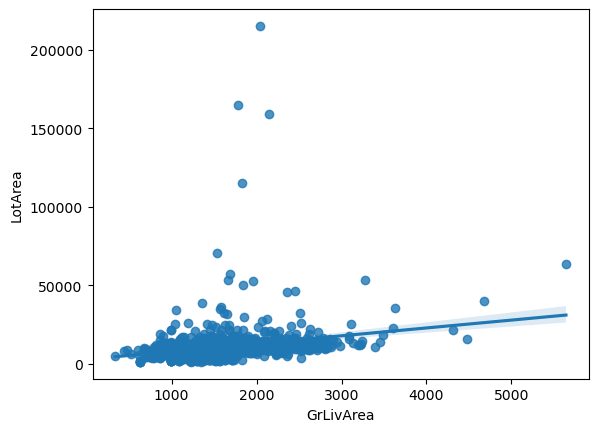

In [50]:
import seaborn as sns

sns.regplot(x = "GrLivArea", y = "LotArea", data = df2)